In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


data = pd.read_csv('//cbio//users//shelbylabuschagne//shelby_labuschagne//84185//JAAMH//CIDR_AlcoholDependence//phs000425v1//p1//phenotype//phs000425.v1.pht002503.v1.p1.c1.dbGAP_phenotype.ARC.txt', sep="\t", skiprows=10)
data

,SUBJID,A1_SEX,A4_AGE,A8a_RACE,adhd,Agoraphobia,alcdep,aspd,Bipolar1,Bipolar2,...,seddep,stimdep,tobdep,AlcDep_Item1,AlcDep_Item2,AlcDep_Item3,AlcDep_Item4,AlcDep_Item5,AlcDep_Item6,AlcDep_Item7
0,Yale_0001,2,27,4,1,1,2,1,1,1,...,1,1,1,2,1,2,1,2,1,1
1,Yale_0002,1,63,4,1,1,2,1,1,1,...,1,1,1,1,2,2,2,2,1,1
2,Yale_0004,1,39,4,2,1,2,1,1,1,...,0,0,1,2,2,2,2,2,2,2
3,Yale_0005,1,40,4,1,1,2,1,1,1,...,1,1,1,2,1,2,2,2,1,1
4,Yale_0006,2,41,4,1,1,2,1,1,1,...,1,1,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,Yale_3332,1,36,4,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2905,Yale_3333,2,27,4,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2906,Yale_3334,2,38,4,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2907,Yale_3335,2,26,4,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [5]:
x = data.drop(['SUBJID'],axis=1).values
y = data['SUBJID'].values

z_scores = stats.zscore(x)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
outliers = (abs_z_scores > 3).all(axis=1)

out = data[outliers]
out

,SUBJID,A1_SEX,A4_AGE,A8a_RACE,adhd,Agoraphobia,alcdep,aspd,Bipolar1,Bipolar2,...,seddep,stimdep,tobdep,AlcDep_Item1,AlcDep_Item2,AlcDep_Item3,AlcDep_Item4,AlcDep_Item5,AlcDep_Item6,AlcDep_Item7


<bound method Series.mean of 0       27
1       63
2       39
3       40
4       41
        ..
2904    36
2905    27
2906    38
2907    26
2908    41
Name: A4_AGE, Length: 2909, dtype: int64>


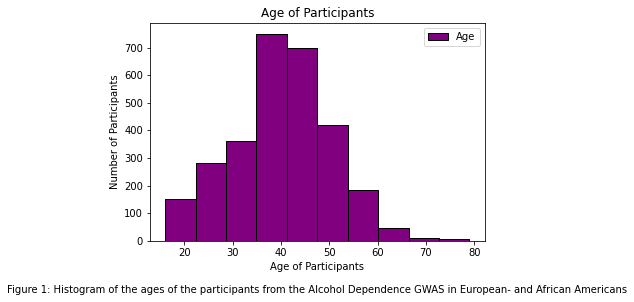

In [6]:
dat=data["A4_AGE"]

df = pd.DataFrame({'Age': dat})
ax = df.plot.hist(rot=0, edgecolor='black', color='purple')
plt.xticks(horizontalalignment="center")
plt.title("Age of Participants")
plt.xlabel('''Age of Participants

Figure 1: Histogram of the ages of the participants from the Alcohol Dependence GWAS in European- and African Americans''')
plt.ylabel("Number of Participants")
 
    
print(data["A4_AGE"].mean)

plt.savefig('/users/shelbylabuschagne/Data Exploration/figure1.png')

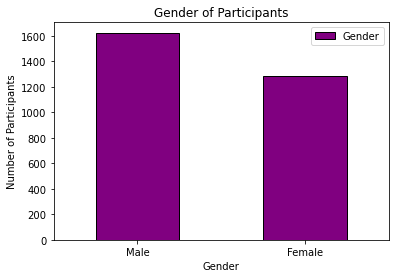

In [43]:
race=data["A1_SEX"]

Male=sum((race==1))
Female=sum((race==2))

gender = [Male, Female]
index = ['Male','Female']
df = pd.DataFrame({'Gender': gender}, index=index)
ax = df.plot.bar(rot=0, edgecolor='black', color='purple')
plt.xticks(horizontalalignment="center")
plt.title("Gender of Participants")
plt.xlabel("Gender")
plt.ylabel("Number of Participants")
plt.savefig('/users/shelbylabuschagne/Data Exploration/figure2.png', bbox_inches="tight")

In [3]:
import seaborn as sb
corr = data.corr()
sb.heatmap(corr, cmap="Blues", annot=False)

ModuleNotFoundError: No module named 'seaborn'

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data.corr()

sns.heatmap(data.corr())
plt.title("Correlation plot of variables")
plt.savefig('/users/shelbylabuschagne/Data Exploration/figure3.jpg', bbox_inches="tight")

ModuleNotFoundError: No module named 'seaborn'

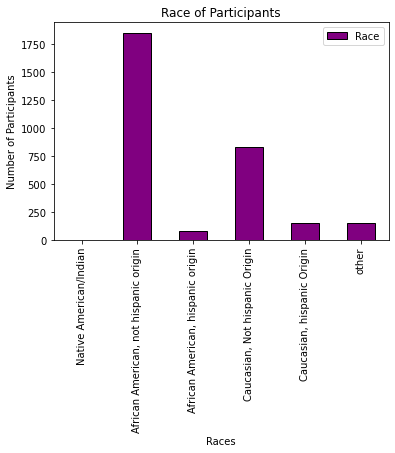

In [42]:
race=data["A8a_RACE"]

NativeAmerican=sum((race==1))
AfricanAmericanBlackNotHispanicOrigin=sum((race==4))
AfricanAmericanBlackHispanicOrigin=sum((race==5))
CaucasianNotHispanicOrigin=sum((race==6))
CaucasianHispanicOrigin=sum((race==7))
Other=sum((race==7))

races = [NativeAmerican, AfricanAmericanBlackNotHispanicOrigin, AfricanAmericanBlackHispanicOrigin, CaucasianNotHispanicOrigin, CaucasianHispanicOrigin, Other]
index = ['Native American/Indian','African American, not hispanic origin','African American, hispanic origin','Caucasian, Not hispanic Origin',
         'Caucasian, hispanic Origin', 'other']
df = pd.DataFrame({'Race': races}, index=index)
ax = df.plot.bar(rot=0, edgecolor='black', color='purple')
plt.xticks(rotation=90,horizontalalignment="center")
plt.title("Race of Participants")
plt.xlabel("Races")
plt.ylabel("Number of Participants")


plt.savefig('/users/shelbylabuschagne/Data Exploration/figure4.png')
plt.savefig('/users/shelbylabuschagne/Data Exploration/figure4.png', bbox_inches="tight")


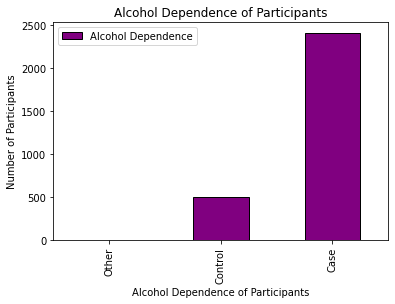

In [3]:
import matplotlib.pyplot as plt

df=data["alcdep"]

Abuse=sum((df==0))
Control=sum((df==1))
Case=sum((df==2))

gender = [Abuse, Control, Case]
index = ['Other','Control',"Case"]
df = pd.DataFrame({'Alcohol Dependence': gender}, index=index)
ax = df.plot.bar(rot=0, edgecolor='black', color='purple')
plt.xticks(rotation=90,horizontalalignment="center")
plt.title("Alcohol Dependence of Participants")
plt.xlabel("Alcohol Dependence of Participants")
plt.ylabel("Number of Participants")
plt.savefig('/users/shelbylabuschagne/Data Exploration/figure5.png', bbox_inches="tight")

In [92]:
#shape
data.shape

#is a data frame
isinstance(data, pd.DataFrame)

True

In [4]:
#print the features
del data['SUBJID']
columnsNamesArr = data.columns.values
columnsNamesArr

array(['A1_SEX', 'A4_AGE', 'A8a_RACE', 'adhd', 'Agoraphobia', 'alcdep',
       'aspd', 'Bipolar1', 'Bipolar2', 'cip', 'CD', 'cocdep',
       'DysthymicDisorder', 'gad', 'Gambling', 'MajDepressiveDisorder',
       'MJDep', 'ocd', 'opidep', 'othdep', 'PanicDisorder', 'ptsd',
       'Schiz', 'SocialPhobia', 'seddep', 'stimdep', 'tobdep',
       'AlcDep_Item1', 'AlcDep_Item2', 'AlcDep_Item3', 'AlcDep_Item4',
       'AlcDep_Item5', 'AlcDep_Item6', 'AlcDep_Item7'], dtype=object)

In [103]:
from sklearn.preprocessing import StandardScaler

features = columnsNamesArr

x = data.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
x.shape


(2909, 34)

In [104]:
#check mean is zero - for stadardisation
np.mean(x)

-6.673955083828413e-17

In [105]:
#check is 1 for standarisation
np.std(x)

1.0

In [106]:
#put it back into the dataframe
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised = pd.DataFrame(x,columns=feat_cols)
normalised.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33
2904,-0.889526,-0.416146,-0.725939,-0.21212,-0.184754,-2.184455,-0.30847,-0.124647,0.096791,-0.979276,...,-0.010044,-0.062186,-1.220902,-1.095652,-1.724542,-1.405147,-1.386946,-2.113775,-0.802186,-1.093376
2905,1.124194,-1.309920,-0.725939,-0.21212,-0.184754,-2.184455,-0.30847,-0.124647,0.096791,-0.979276,...,-0.010044,-0.062186,-1.220902,-1.095652,-1.724542,-1.405147,-1.386946,-2.113775,-0.802186,-1.093376
2906,1.124194,-0.217529,-0.725939,-0.21212,-0.184754,-2.184455,-0.30847,-0.124647,0.096791,-0.979276,...,-0.010044,-0.062186,-1.220902,-1.095652,-1.724542,-1.405147,-1.386946,-2.113775,-0.802186,-1.093376
2907,1.124194,-1.409229,-0.725939,-0.21212,-0.184754,-2.184455,-0.30847,-0.124647,0.096791,-0.979276,...,-0.010044,-0.062186,-1.220902,-1.095652,-1.724542,-1.405147,-1.386946,-2.113775,-0.802186,-1.093376
2908,1.124194,0.080396,-0.725939,-0.21212,-0.184754,-2.184455,-0.30847,-0.124647,0.096791,-0.979276,...,-0.010044,-0.062186,-1.220902,-1.095652,-1.724542,-1.405147,-1.386946,-2.113775,-0.802186,-1.093376


In [180]:
#PCA method
from sklearn.decomposition import PCA
#guessing 20
pca_dat = PCA(n_components=30)
principalComponents_dat = pca_dat.fit_transform(normalised)

In [181]:
#actual components
principal_dat_Df = pd.DataFrame(data = principalComponents_dat)

In [182]:
#explained_variance_ratio
print('Explained variation per principal component: {}'.format(pca_dat.explained_variance_ratio_))


Explained variation per principal component: [0.17137111 0.14139482 0.04259602 0.0386416  0.03799083 0.03395002
 0.03274101 0.03142212 0.0299743  0.0287747  0.02728245 0.02612685
 0.02567113 0.02395326 0.0233264  0.02258875 0.02201797 0.02068458
 0.02013808 0.0192662  0.01871772 0.01798477 0.01696622 0.0165258
 0.01625347 0.01595635 0.01458899 0.01325434 0.01168841 0.01088088]


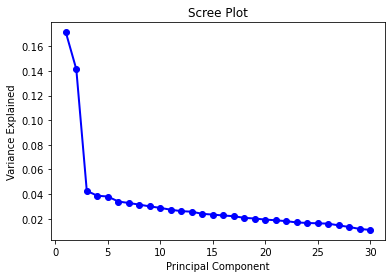

In [183]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca_dat.n_components_) + 1
plt.plot(PC_values, pca_dat.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [184]:
#PCA method - based on scree plot above
from sklearn.decomposition import PCA
#guessing 20
pca_dat = PCA(n_components=3)
principalComponents_dat = pca_dat.fit_transform(normalised)

#actual components
principal_dat_Df = pd.DataFrame(data = principalComponents_dat)

#explained_variance_ratio
print('Explained variation per principal component: {}'.format(pca_dat.explained_variance_ratio_))

Explained variation per principal component: [0.17137111 0.14139482 0.04259014]


In [198]:
#PCA second time - no normalisation
#It is using the correlation between some dimensions and tries to provide a minimum number of 
#variables that keeps the maximum amount of variation or information about how the original data is distributed. 

#Set up variables 
np.random.seed(42)
N=2909
feat_cols = columnsNamesArr
#Because we dont want to be using 70,000 digits in some calculations we’ll take a random subset of the digits. 
#The randomisation is important as the dataset is sorted by its label (i.e., the first seven thousand or so are zeros, etc.). 
#To ensure randomisation we’ll create a random permutation of the number 0 to 69,999 which allows us later 
#to select the first five or ten thousand for our calculations and visualisations.
rndperm = np.random.permutation(data.shape[0])

df_subset = data.loc[rndperm[:N],:].copy()
#data_subset = df_subset[feat_cols].values



pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.94770039 0.01369825 0.00761888]


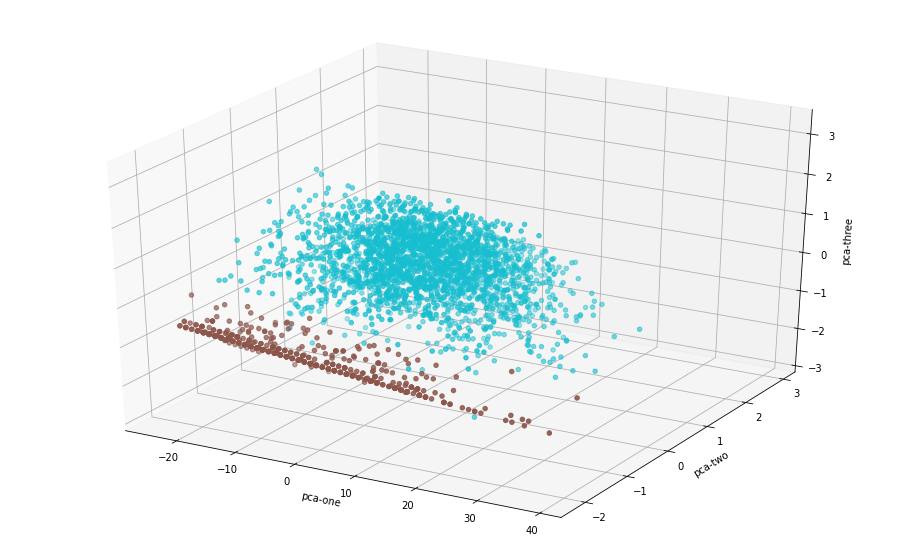

In [229]:
#3D rep of PCA components = 3
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset.loc[rndperm,:]["pca-one"], 
    ys=df_subset.loc[rndperm,:]["pca-two"], 
    zs=df_subset.loc[rndperm,:]["pca-three"], 
    c=df_subset.loc[rndperm,:]["alcdep"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()


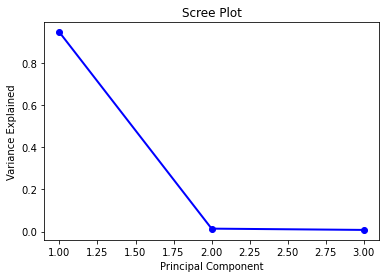

In [234]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [18]:
#Splitting the data into training and test sets
np.random.seed(42)
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)


In [ ]:
#KNN
#This function produces the best parameters to use for a function to the user. 
#The function sets up a grid of tuning parameters for the classification problem (in this case), 
#fits each model and then calculates a resampling based performance measure for each model fitted. 
#After this, the function produces performance measures to guide the user as to which parameter values produce the best result.


In [82]:
#setting up the x and y data for KNN
np.random.seed(42)
x=data.loc[:, data.columns != 'alcdep']
y = data["alcdep"]

#set up the test and training data for the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

#scaling the data for the best results 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#Using KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

#make predictions on our test data
y_pred = classifier.predict(X_test)

#evaluation of the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))




[[108   1]
 [  3 470]]
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       109
           2       1.00      0.99      1.00       473

    accuracy                           0.99       582
   macro avg       0.99      0.99      0.99       582
weighted avg       0.99      0.99      0.99       582



Text(0, 0.5, 'Mean Error')

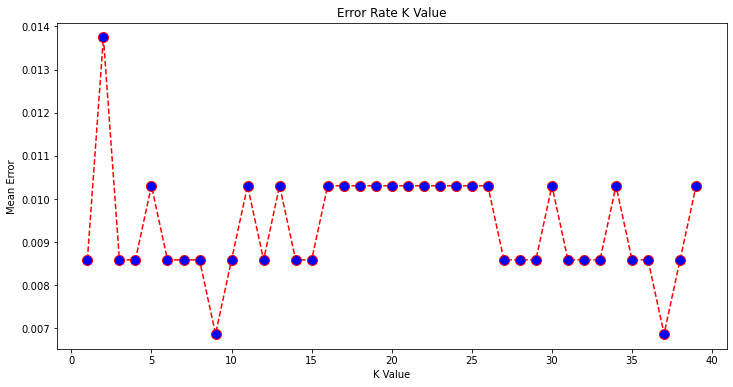

In [83]:
import matplotlib.pyplot as plt

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
    
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [84]:
#T-SNE
#imports
import time
from sklearn.manifold import TSNE
import seaborn as sns



#set up variables 
data_subset = data[feat_cols].values

#n components = 2
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))



NameError: name 'feat_cols' is not defined

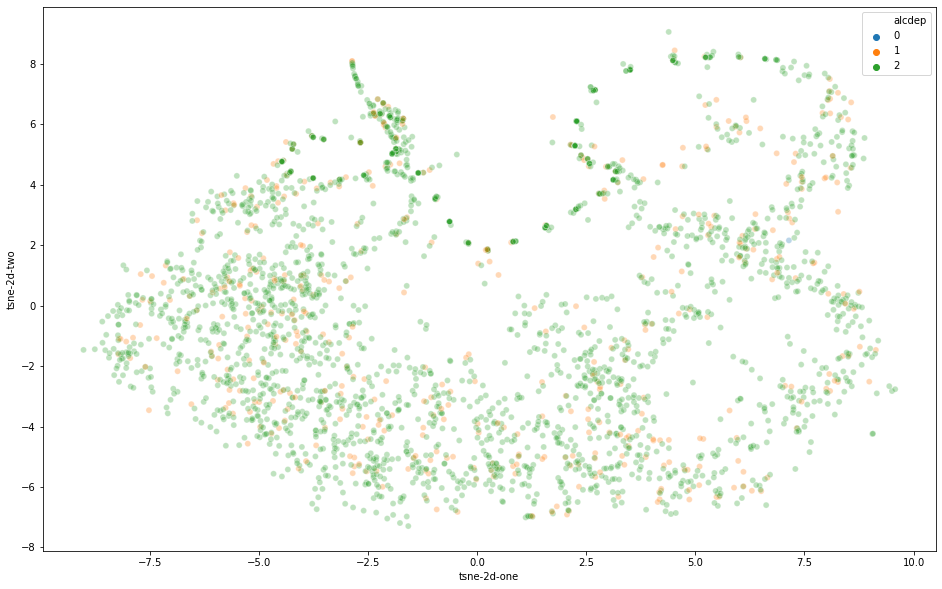

In [258]:
#scatter plot
y=data["alcdep"]

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette(n_colors=3),
    data=df_subset,
    legend="full",
    alpha=0.3,
    hue=data["alcdep"]
)



In [237]:
#n components = 3
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2909 samples in 0.017s...
[t-SNE] Computed neighbors for 2909 samples in 0.152s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2909
[t-SNE] Computed conditional probabilities for sample 2000 / 2909
[t-SNE] Computed conditional probabilities for sample 2909 / 2909
[t-SNE] Mean sigma: 1.115890
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.298904
[t-SNE] KL divergence after 300 iterations: 1.088337
t-SNE done! Time elapsed: 15.637011766433716 seconds


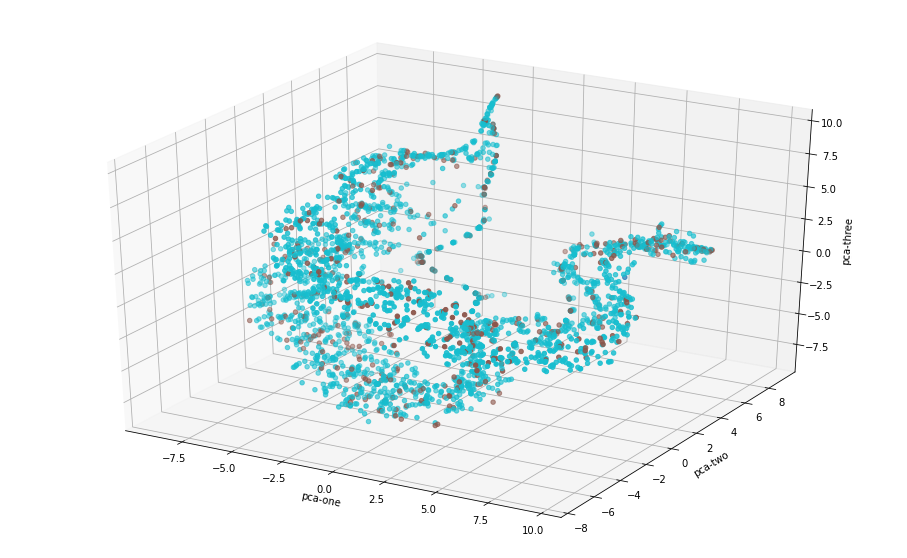

In [279]:
#3D rep of PCA components = 3
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['tsne-2d-three'] = tsne_results[:,2]


#3D rep of PCA components = 3
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset.loc[rndperm,:]["tsne-2d-one"], 
    ys=df_subset.loc[rndperm,:]["tsne-2d-two"], 
    zs=df_subset.loc[rndperm,:]["tsne-2d-three"], 
    c=df_subset.loc[rndperm,:]["alcdep"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()




In [170]:
#another TSE algorithm
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(df_subset)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2909 samples in 0.008s...
[t-SNE] Computed neighbors for 2909 samples in 0.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2909
[t-SNE] Computed conditional probabilities for sample 2000 / 2909
[t-SNE] Computed conditional probabilities for sample 2909 / 2909
[t-SNE] Mean sigma: 4.060934
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.945015
[t-SNE] KL divergence after 1000 iterations: 0.347879


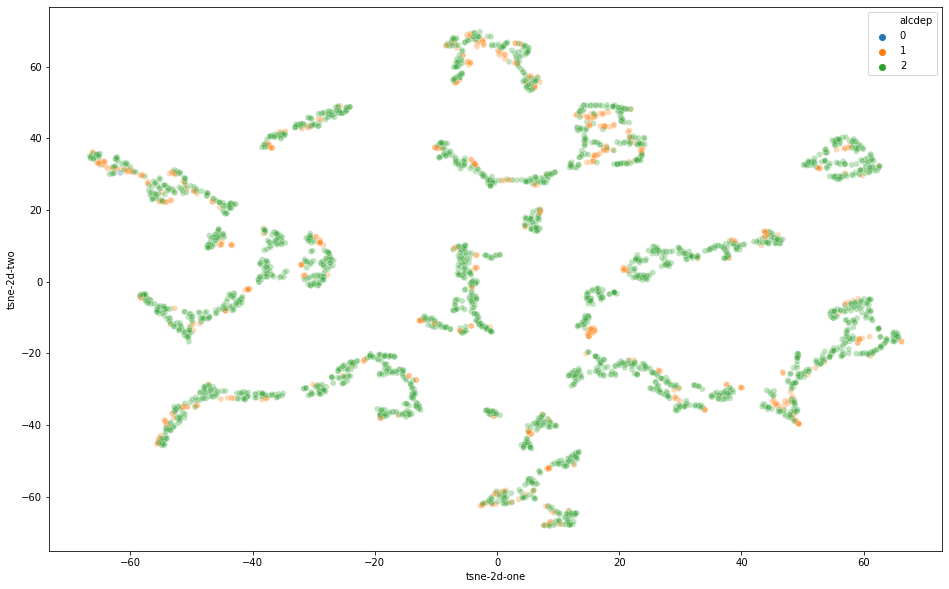

In [300]:
df_subset['tsne-2d-one'] = tsne_em[:,0]
df_subset['tsne-2d-two'] = tsne_em[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette(n_colors=3),
    data=df_subset,
    legend="full",
    alpha=0.3,
    hue=data["alcdep"]
)

In [285]:
#another way to tse

from sklearn.manifold import TSNE
import time
time_start = time.time()
RS=123
fashion_tsne = TSNE(random_state=RS).fit_transform(data)

print("tSNE done! Time elapsed: {} seconds".format(time.time()-time_start))

tSNE done! Time elapsed: 22.111428022384644 seconds


(-97.12158889770508, 94.60797805786133, -49.34942760467529, 41.55342617034912)

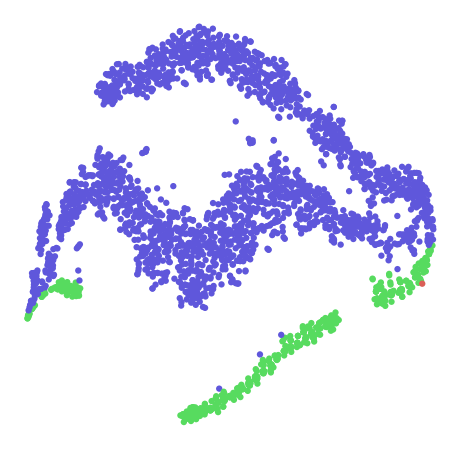

In [296]:
num_classes = len(np.unique(data["alcdep"]))
palette = np.array(sns.color_palette("hls", num_classes))

# create a scatter plot.
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(fashion_tsne[:,0], fashion_tsne[:,1], lw=0, s=40, c=palette[data["alcdep"].astype(np.int)])
plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')

In [292]:
#PCA into TSE

time_start = time.time()

pca_3 = PCA(n_components=3)
pca_result_3 = pca_3.fit_transform(data)

print ('PCA with 3 components done! Time elapsed: {} seconds'.format(time.time()-time_start))
print ('Cumulative variance explained by 3 principal components: {}'.format(np.sum(pca_3.explained_variance_ratio_)))

PCA with 3 components done! Time elapsed: 0.016256093978881836 seconds
Cumulative variance explained by 3 principal components: 0.9690175257880251


In [297]:
import time
time_start = time.time()

fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_3)
#Notice how the time taken to run t-SNE is reduced drastically.
print( 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 16.559375047683716 seconds


(-88.02214851379395, 81.89341773986817, -81.56573905944825, 79.18951072692872)

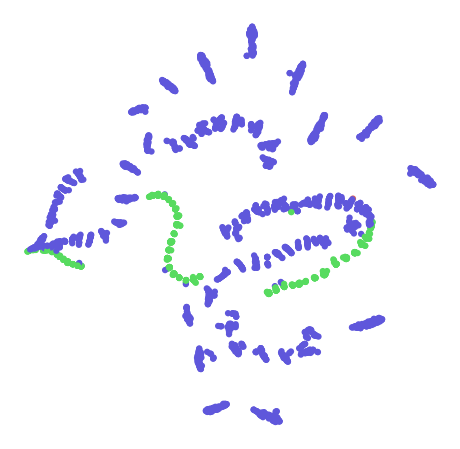

In [301]:
num_classes = len(np.unique(data["alcdep"]))
palette = np.array(sns.color_palette("hls", num_classes))

# create a scatter plot.
f = plt.figure(figsize=(8, 8))
ax = plt.subplot(aspect='equal')
sc = ax.scatter(fashion_pca_tsne[:,0], fashion_pca_tsne[:,1], lw=0, s=40, c=palette[data["alcdep"].astype(np.int)])
plt.xlim(-25, 25)
plt.ylim(-25, 25)
ax.axis('off')
ax.axis('tight')

In [302]:
#lets try isomap
